In [1]:
#loading dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset to pandas dataframe
insure = pd.read_csv(r"C:\Users\User\Downloads\Insurance\insurance.csv")

In [3]:
#print first 5 rows of dataset
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insure.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#total rows and columns in dataset
insure.shape

(1338, 7)

In [6]:
#getting statistical information
insure.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#getting dtypes in data
insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#finding null value in our dataset
insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='sex', ylabel='age'>

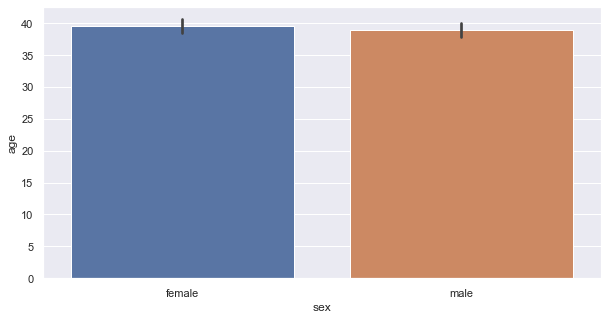

In [9]:
sns.set_theme()
plt.figure(figsize=(10,5))
sns.barplot(data=insure,x='sex',y='age')

<AxesSubplot:xlabel='smoker', ylabel='age'>

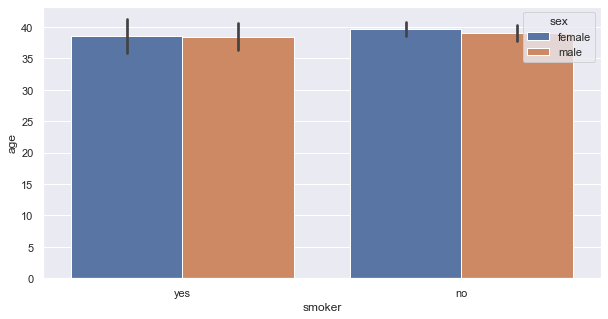

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=insure,x='smoker',y='age',hue='sex')

<AxesSubplot:xlabel='region', ylabel='children'>

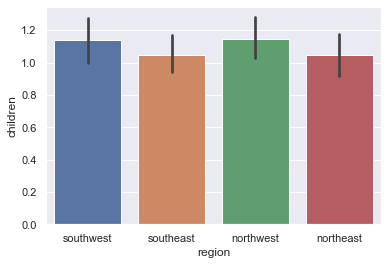

In [11]:
sns.barplot(data=insure,x='region',y='children')

<AxesSubplot:xlabel='sex', ylabel='children'>

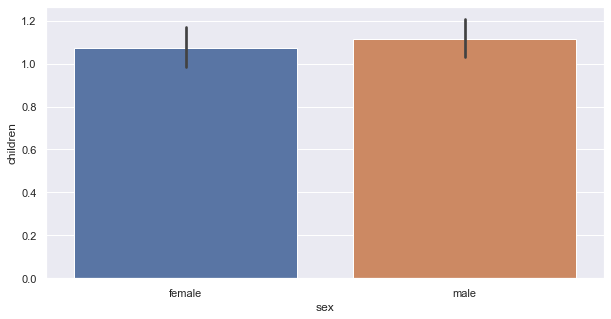

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=insure,x='sex',y='children')

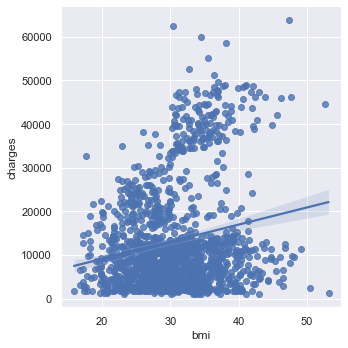

In [13]:
sns.lmplot(x='bmi',y='charges',data=insure)

<AxesSubplot:xlabel='charges', ylabel='Density'>

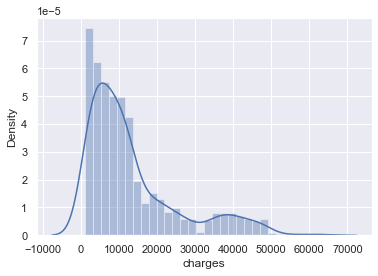

In [14]:
sns.distplot(insure['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

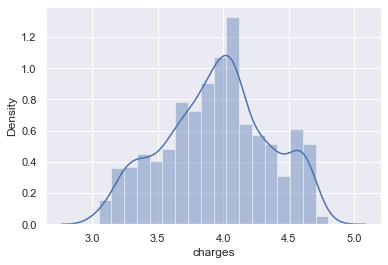

In [15]:
sns.distplot(np.log10(insure['charges']))

Text(0.5, 1.0, 'Smoker Vs charges')

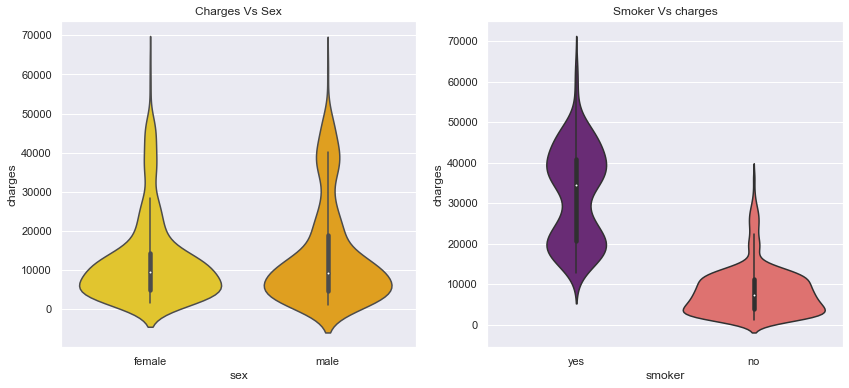

In [16]:
f=plt.figure(figsize=(14,6))
ax=f.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=insure,palette='Wistia',ax=ax)
ax.set_title("Charges Vs Sex")

ax = f.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=insure,palette='magma',ax=ax)
ax.set_title("Smoker Vs charges")

<AxesSubplot:xlabel='children', ylabel='charges'>

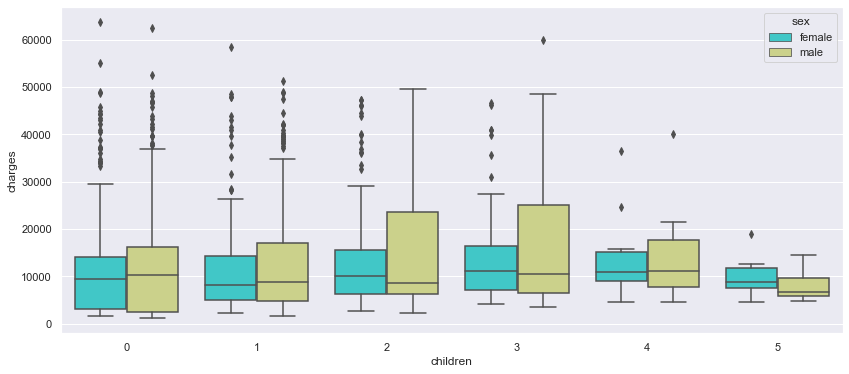

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue='sex',data=insure,palette='rainbow')

In [18]:
insure.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


<AxesSubplot:xlabel='region', ylabel='charges'>

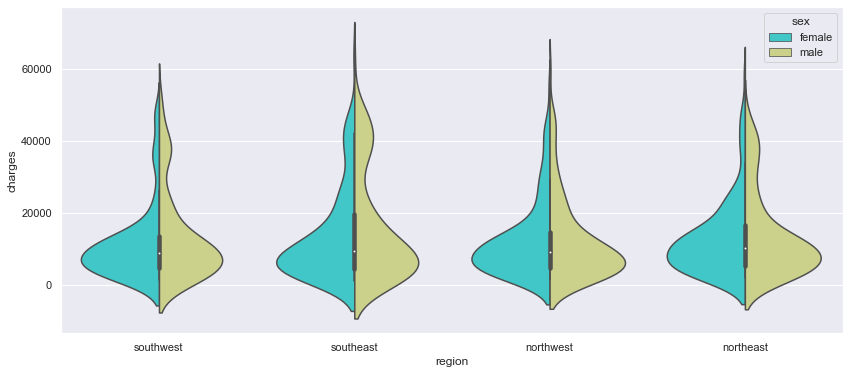

In [19]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue='sex',data=insure,palette='rainbow',split=True)

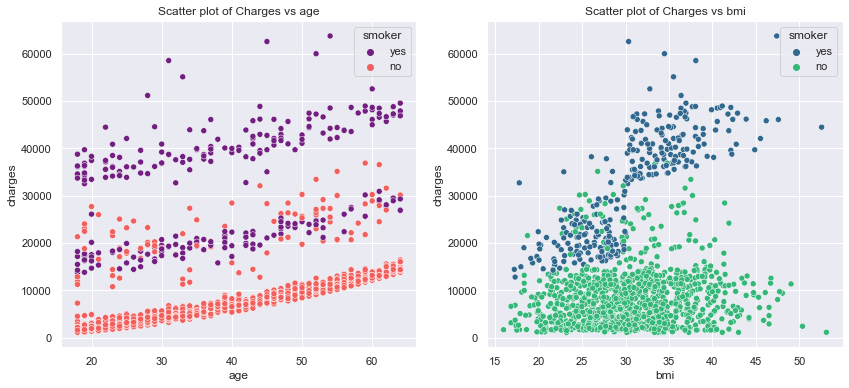

In [20]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=insure,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=insure,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st  and  2nd  slab, for smoker policy start at  2nd  and  3rd  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2  and maximum upto 54 kg/m2

In [21]:
insure['sex'] = pd.factorize(insure['sex'])[0] + 1
insure['region'] = pd.factorize(insure['region'])[0] + 1
insure['smoker'] = pd.factorize(insure['smoker'])[0] + 1

In [22]:
# Splitting train test and split
X = insure.drop(columns='charges',axis=1)
Y = insure['charges']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

## Model Evaluation

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_std,Y_train)

LinearRegression()

In [37]:
y_pred = linear_reg.predict(X_test_std)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(Y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(Y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,4.285219e+03
MSE_li_reg,3.836483e+07
RMSE_li_reg,6.193935e+03


In [41]:
scores = cross_val_score(linear_reg, X_train_std, Y_train, cv=5)
print(np.sqrt(scores))

[0.89136155 0.89777715 0.87638193 0.79484106 0.82457193]


In [42]:
r2_score(Y_test, linear_reg.predict(X_test_std))

0.7445422986536503

In [45]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_std, Y_train)

GradientBoostingRegressor()

In [46]:
y_pred = Gradient_model.predict(X_test_std)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(Y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(Y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.361317e+03
MSE_gradient,1.982954e+07
RMSE_gradient,4.453038e+03


In [47]:
scores = cross_val_score(Gradient_model, X_train_std,Y_train, cv=5)
print(np.sqrt(scores))

[0.94803307 0.92635539 0.92521005 0.87265974 0.90967124]


In [48]:
r2_score(Y_test, Gradient_model.predict(X_test_std))

0.8679621523485521

In [53]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_std, Y_train);

In [54]:
y_pred = XGB_model.predict(X_test_std)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(Y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(Y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])

,Metrics
MAE_XGB,2.974245e+03
MSE_XGB,2.643297e+07
RMSE_XGB,5.141300e+03


In [55]:
scores = cross_val_score(XGB_model, X_train_std, Y_train, cv=5)
print(np.sqrt(scores))

[0.93750945 0.88752551 0.91049985 0.84806262 0.88070942]


In [57]:
r2_score(Y_test, XGB_model.predict(X_test_std))

0.8239923311785823

In [58]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_std, Y_train)

DecisionTreeRegressor()

In [59]:
y_pred = tree_reg_model.predict(X_test_std)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(Y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(Y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,2.792504e+03
MSE_tree_reg,3.979888e+07
RMSE_tree_reg,6.308635e+03


In [60]:
scores = cross_val_score(tree_reg_model, X_train_std, Y_train, cv=5)
print(np.sqrt(scores))

[0.87102463 0.81075664 0.8324857  0.81974969 0.80234561]


In [61]:
r2_score(Y_test, tree_reg_model.predict(X_test_std))

0.7349934757960195

In [62]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_std, Y_train);

In [63]:
y_pred = forest_reg_model.predict(X_test_std)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(Y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(Y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.774001e+03
MSE_forest_reg,2.487649e+07
RMSE_forest_reg,4.987634e+03


In [64]:
scores = cross_val_score(forest_reg_model, X_train_std, Y_train, cv=5)
print(np.sqrt(scores))

[0.94588193 0.9140811  0.92065738 0.86566159 0.89817885]


In [65]:
r2_score(Y_test, forest_reg_model.predict(X_test_std))

0.8343563591053748